In [1]:
# here we are using :
# no. of fileters = 32
# size of each fileter = 3*3
# each pool size = 2*2

In [2]:
from keras.layers import Convolution2D

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
from keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#modification for increasing accuracy
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [12]:
#modification for increasing accuracy
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [14]:
#layer inwhich we areconverting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [16]:
# layer: appling relu to give positive output
# from here our hidden layerrs starts
model.add(Dense(units=128, activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
Total params: 813,088
Trainable params: 813,088
Non-trainable params: 0
________________________________________________

In [18]:
#output layer : to provide binary output using sigmoid function
model.add(Dense(units=3, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from keras_preprocessing.image import ImageDataGenerator

In [22]:
#image augmentation
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'Dataset/train/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        'Dataset/test/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
model.fit(
        training_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=20)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 0.0788 - accuracy: 0.9734 - val_loss: 1.4088e-07 - val_accuracy: 1.0000
Epoch 2/5
50/50 [==============================] - 50s 1s/step - loss: 1.3560e-06 - accuracy: 1.0000 - val_loss: 5.4457e-07 - val_accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 47s 940ms/step - loss: 9.3588e-07 - accuracy: 1.0000 - val_loss: 2.6280e-07 - val_accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 54s 1s/step - loss: 9.3511e-07 - accuracy: 1.0000 - val_loss: 1.2734e-07 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 50s 1s/step - loss: 9.1923e-07 - accuracy: 1.0000 - val_loss: 2.1133e-07 - val_accuracy: 1.0000


In [23]:
#model.save("new_cnn_model.h5")   #save model

In [ ]:
#from keras.models import load_model
#model=load_model("cnn_model.h5")  #load model

In [ ]:
#testing on a pic that not in training and also not in test set whereas it has not been shown to our model.

In [24]:
from keras.preprocessing import image

In [98]:
test_image = image.load_img("Dataset/sample/e.jpeg",target_size=(64,64))
#test_image = image.load_img("C:/Users/ASUS/Desktop/cat.jpg",target_size=(64,64))

In [99]:
type(test_image)

PIL.Image.Image

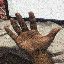

In [100]:
test_image #since this format is PIL or pillow so it can be printed

In [101]:
test_image = image.img_to_array(test_image)  #convert PIL image to numpy array

In [102]:
type(test_image)

numpy.ndarray

In [103]:
test_image.shape

(64, 64, 3)

In [104]:
import numpy as np

In [105]:
test_image = np.expand_dims(test_image,axis=0)
#since keras uses tensor flow and for tensorflow it needs 4d image so we converted 3d image to 4d image using above

In [106]:
test_image.shape

(1, 64, 64, 3)

In [107]:
result = model.predict(test_image)

In [108]:
training_set.class_indices # to see classes of our dataset

{'down': 0, 'up': 1, 'wait': 2}

In [109]:
#to check where this particular image belongs to, so these above values means that 0 represents cat and 1 represents dog

In [110]:
result

array([[0., 0., 1.]], dtype=float32)

In [111]:
if result[0][0]==1:
    print("Down")
elif result[0][1]==1:
    print("Up")
else:
    print("Wait")

Wait


In [39]:
#### live

In [65]:
from keras.models import load_model
model=load_model("new_cnn_model.h5")  #load model
import cv2
import pyautogui
pyautogui.FAILSAFE=False
import time 
from keras.preprocessing import image
import numpy as np
cap = cv2.VideoCapture(0)
ans=""

#time.sleep(5)
start_time=time.time()
play=0

while True:
    ans=""
    status , photo = cap.read()
    if photo is None:
        continue
    test_image=photo.copy()
    test_image = cv2.resize(test_image,(64,64))
    test_image = np.expand_dims(test_image,axis=0)
#since keras uses tensor flow and for tensorflow it needs 4d image so we converted 3d image to 4d image using above
    result = model.predict(test_image)
    if result[0][0]==1:
        cv2.putText(photo,"Down",(50, 50),cv2.FONT_HERSHEY_SIMPLEX ,1,(255, 0, 0),2,cv2.LINE_AA)
        ans="down"
        pyautogui.click(1356, 716) 
    elif result[0][1]==1:
        cv2.putText(photo,"Up",(50, 50),cv2.FONT_HERSHEY_SIMPLEX ,1,(255, 0, 0),2,cv2.LINE_AA)
        ans="up"
        pyautogui.click(1356, 210) 
    elif result[0][2]==1:
        cv2.putText(photo,"wait",(50, 50),cv2.FONT_HERSHEY_SIMPLEX ,1,(255, 0, 0),2,cv2.LINE_AA)
        ans="wait"
        
        
        
        
    cv2.imshow('hi' , photo)
    
    cur_time=time.time()
    timer=cur_time-start_time
    if cv2.waitKey(10) == 13 or timer>=60:  #when pressed enter it break loop will close or when timer expires
        break
    #print(timer)
    
    
cv2.destroyAllWindows()
cap.release()

In [47]:
cap.release()

In [61]:
import pyautogui 
print(pyautogui.position()) 


Point(x=1356, y=717)
